# Algoritmos no supervisados

## Introducción

La base de datos utilizada contiene información de diferentes indicadores, así como un total de 3,862 registros en un periodo de 01/07/2008 - 31/10/2023:

    1. Precio USD/MXN
    2. Producto Interno Bruto (PIB)
    3. Índice de desempleo
    4. Índice Nacional de Precios al Consumidor (INPC)
    5. Indicador Global de la Actividad Económica
    6. Indicador de Pedidos Manufactureros
    
Donde la variable Precio USD/MXN es nuestra variable dependiente y las demás variables son nuestras variables independientes, las seis variables presentadas son continuas.
    
Como algunos indicadores se presentan de manera mensual o trimestral se realizó una interpolación para que todos estuvieran en un mismo periodo diario, así como se presenta el precio del USD/MXN.

El objetivo es poder predecir el tipo de cambio USD/MXN, dado el análisis ya realizado con anterioridad, este conjunto de variables presenta un alta multicolinealidad por lo que es preferible utilizar otro modelo que no sea una regresión lineal.

## Modelo No Supervisado

Realizando mi investigación vi que para predecir el precio del USD/MXN, generalmente se utilizan algoritmos supervisados en lugar de no supervisados ya que, los algoritmos supervisados requieren datos etiquetados, es decir, datos históricos de precios junto con las etiquetas correspondientes que representan los precios reales en un período de tiempo futuro.

Los algoritmos no supervisados pueden que no sean muy útiles para la predicción de series temporales como el precio de divisas, pero algunos de estos métodos pueden servir para el análisis de patrones y la identificación de tendencias.

Uno de los modelos no supervisados que podemos utilizar es el algoritmo de agrupamiento K-meansm, este es uno de los métodos más populares en aprendizaje no supervisado y cuyo objetivo principal es dividir un conjunto de datos en k grupos (o "clusters") basándose en características similares. Cada grupo contiene puntos de datos que son más similares entre sí que con los puntos de datos en otros grupos.

### K-means Clustering

El metodo de K-means es un algoritmo de aprendizaje no supervisado utilizado para agrupar datos en conjuntos, también conocidos como "clusters". El objetivo del algoritmo es dividir un conjunto de datos en k grupos basados en características similares. 

El proceso de K-means funciona de la siguiente manera:

1. Inicialización de centroides: se selecciona aleatoriamente k puntos como centroides iniciales, donde k es el número de clusters que se desea formar.

2. Asignación de puntos al cluster más cercano: cada punto de datos se asigna al cluster cuyo centroide está más cerca en términos de distancia euclidiana.

3. Actualización de centroides: se calcula nuevos centroides para cada cluster tomando el promedio de todos los puntos asignados a ese cluster.

4. Repetición: los pasos 2 y 3 se repiten iterativamente hasta que los centroides ya no cambian significativamente o se alcanza un número predefinido de iteraciones.

El resultado final es una partición de los datos en k clusters, donde cada punto pertenece al cluster cuyo centroide es el más cercano.

K-means es un algoritmo eficiente y ampliamente utilizado en diversas aplicaciones, como segmentación de clientes. Sin embargo,  la elección del número de clusters puede afectar significativamente los resultados, y a veces se requiere cierto conocimiento del dominio o métodos adicionales para determinar el valor óptimo de k.

#### Método del Codo (Elbow Method)
El Elbow Method es uno de los metodos mas utilizados para determinar el valor óptimo de k y consiste de lo siguiente:

1. Ejecuta el algoritmo K-means en el conjunto de datos para un rango de valores de k (por ejemplo, desde k=1 hasta k=10).

2. Después de cada ejecución, calcula la suma de los cuadrados de las distancias intra-cluster (SSE), que mide la variabilidad dentro de cada cluster.

3. Grafica la SSE en función de los diferentes valores de k. A medida que aumenta k, es de esperar que la SSE disminuya, ya que se pueden formar clusters más pequeños. Sin embargo, existe un punto en el que la mejora en la SSE disminuye, formando un "codo" en el gráfico.

4. Busca visualmente el punto en el gráfico donde la disminución de la SSE se aplana. Este punto se considera el "codo" y puede ser un indicador del número óptimo de clusters.


<img src="elbow.png" alt="Método del Codo (Elbow Method)" width="50%"/>


En algunos casos, el gráfico puede no mostrar un codo claro, lo que hace que la toma del valor óptimo de k sea más subjetiva.

#### Método de la Silueta (Silhouette Method)

El Silhouette Method es otro metodo que nos puede ayudar a obtener el número optimo de k y funciona de la siguiente manera:

1. Después de ejecutar K-means para diferentes valores de k, calcula la medida de la silueta para cada punto en el conjunto de datos. La medida de la silueta para un punto es (b - a) / max(a, b), donde "a" es la distancia promedio al resto de puntos en el mismo cluster y "b" es la distancia promedio al cluster más cercano al que el punto no pertenece.

2. Calcula el promedio de la medida de la silueta para todos los puntos en cada cluster y luego obtén el promedio general para cada valor de k.

3. Grafica el valor promedio de la silueta en función de los diferentes valores de k.

4. Busca el valor de k que maximiza el promedio de la medida de la silueta. Un valor más alto de la silueta indica que los clusters están mejor definidos y bien separados.

<img src="Silueta.png" alt="Método de la Silueta (Silhouette Method)" width="50%"/>


Este método tiene la ventaja de proporcionar una métrica más directa de la calidad del clustering para diferentes valores de k. Sin embargo, al igual que con el Método del Codo, la interpretación puede ser subjetiva y la elección de k puede depender del conjunto de datos y del problema que se esta trabajando.

#### Silhouette Score
El Silhouette Score es una métrica que cuantifica la calidad de los clusters en un modelo de clustering. Esta métrica nos dice que tan bien separados están los clusters. El Silhouette Score se calcula para cada punto de datos y se obtiene tomando el promedio de estas puntuaciones.

La fórmula para el Silhouette Score de un punto i en un conjunto de datos es la siguiente:

$$
\text{Silhouette Score}(i) = \frac{b_i - a_i}{\max\{a_i, b_i\}}
$$

Donde:
- \(a_i\) es la distancia promedio del punto \(i\) a los demás puntos en el mismo cluster (intra-cluster).
- \(b_i\) es la distancia promedio del punto \(i\) a los puntos en el cluster más cercano diferente (inter-cluster).

El valor del Silhouette Score esta entre -1 y 1:

- Un valor cercano a 1 indica que el punto está bien clasificado en su cluster y está bastante alejado de los puntos en otros clusters.
- Un valor cercano a -1 indica que el punto podría haberse asignado incorrectamente al cluster vecino y no está bien separado.
- Un valor cercano a 0 indica que el punto está en o cerca del límite entre dos clusters.

El Silhouette Score global para todo el conjunto de datos es el promedio de los Silhouette Scores individuales. Por lo tanto, para evaluar la calidad general de los clusters, se busca un Silhouette Score más cercano a 1.

En términos generales:

- Si el Silhouette Score es cercano a 1, indica que los clusters están bien separados.
- Si el Silhouette Score es cercano a -1, puede haber superposición entre clusters.
- Si el Silhouette Score está cerca de 0, los clusters pueden solaparse o ser demasiado cercanos entre sí.

## Aplicación del Modelo No Supervisado

In [1]:
#Librerias utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
#Importar datos
df = pd.read_excel(r'C:\Users\tmoli\OneDrive\Documentos\Angel\Maestria\Materias\3. Aprendizaje Automatico\BD\df_USDMXN.xlsx')

df = df[['TipoCambio', 'PIB', 'INPC', 'IndiceDesempleo','Indice_Pedidos_Manufactureros', 'IGAE']]

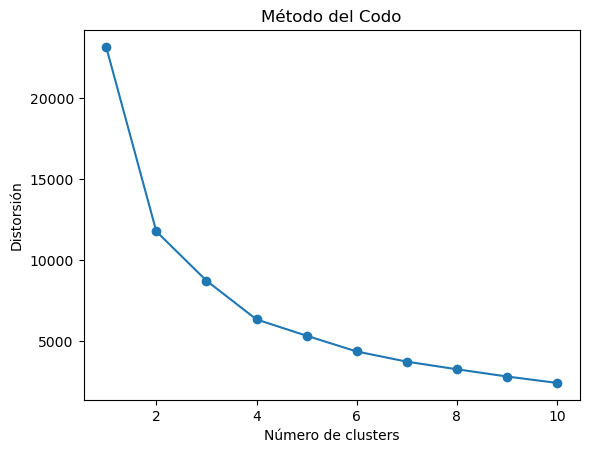

In [3]:
# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Método del Codo (Elbow Method)
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

# Gráfica del Método del Codo
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

Observando la grafica del método del codo, nos dice que el número de cluster óptimo es 3.

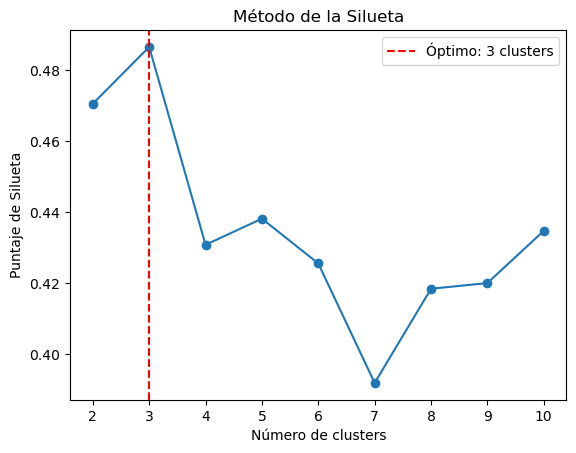

In [4]:
# Método de la Silueta (Silhouette Method)
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Encontrar el número óptimo de clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 porque empezamos desde 2 clusters

# Mostrar la gráfica del Método de la Silueta con línea punteada en el número óptimo de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.axvline(x=optimal_clusters, color='red', linestyle='--', label=f'Óptimo: {optimal_clusters} clusters')
plt.title('Método de la Silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Puntaje de Silueta')
plt.legend()
plt.show()

Observando la grafica del método de la silueta, nos dice que el número de cluster óptimo es 3.

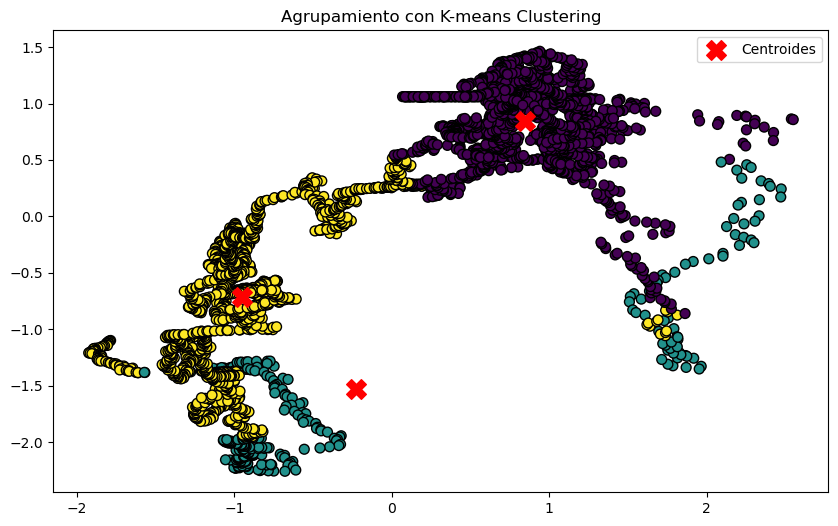

In [5]:
# Elegir el número óptimo de clusters (N)
optimal_clusters = 3

# Aplicar K-means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Visualizar los clusters en una gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.title('Agrupamiento con K-means Clustering')
plt.legend()
plt.show()

In [8]:
# Contar la frecuencia de cada cluster
cluster_counts = np.bincount(cluster_labels)

# Mostrar el número de registros en cada cluster
for cluster_num, count in enumerate(cluster_counts):
    print(f'Cluster {cluster_num}: {count} registros')

Cluster 0: 1922 registros
Cluster 1: 302 registros
Cluster 2: 1638 registros


In [6]:
# Calcular y mostrar la métrica Silhouette Score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.48663170248242815


Dado que, el Silhouette Score es de 0.4866, esto nos dice que la configuración de clusters es bastante buena.

## Conclusión

La aplicación del método K-Means reveló una segmentación de datos bastante buena sin embargo, dada la naturaleza volátil del tipo de cambio USD/MXN, por lo que sugiero seguir con la búsqueda del algoritmo más eficiente para lograr predicciones óptimas. La complejidad inherente a las fluctuaciones en el precio del dólar frente al peso mexicano sugiere la necesidad de una exploración más profunda de alternativas algorítmicas que puedan adaptarse de manera más precisa a las variaciones del mercado.


| Clusters | Registros |
| ------------ | ------------ |
| Cluster 0    | 1922    |
| Cluster 1    | 302     |
| Cluster 2    | 1638    |
